In [111]:
import geopandas as gpd
import geoplot as gplt
import numpy as np
import scipy.stats as stats

In [112]:
ng_water_points = gpd.read_file("nigeria_water_points.geojson")
ng_water_points.rename(columns={"water_typ": "water_type"}, inplace=True)

ng_water_points.head()

,FID,globalid,uniq_id,timestamp,editor,scdy_edtor,wardname,wardcode,lganame,lgacode,statename,statecode,water_type,alt_name,name,source,geometry
0,1,7a0b763c-393c-48b8-95d2-ad539d63fe8f,105377,2018-03-01 00:00:00+00:00,racheal.olarewaju,,Oguduokwo Oshiri,EBSNCA16,Onicha,11013,Ebonyi,EB,Well,,Mr Chukwu Borehole,GRID,POINT (7.85568 6.11929)
1,2,3aa2a940-9cff-45c2-bede-7d2c2f6454bd,105378,2018-03-01 00:00:00+00:00,racheal.olarewaju,,Oguduokwo Oshiri,EBSNCA16,Onicha,11013,Ebonyi,EB,Borehole,,Ifuagangbo Owom Borehole,GRID,POINT (7.87162 6.11942)
2,3,3a0edbd8-db7b-43c7-88f7-8562b9a8a31a,105379,2018-06-06 00:00:00+00:00,racheal.olarewaju,,Ngwaiyiekwe / Ward Ten,ABSGWB07,Ugwunagbo,1012,Abia,AB,Borehole,,Amayi Borehole,GRID,POINT (7.33469 5.00650)
3,4,23d207a9-6638-4bce-b5c6-f3612ea82d87,105380,2018-06-06 00:00:00+00:00,racheal.olarewaju,,Ngwaiyiekwe / Ward Ten,ABSGWB07,Ugwunagbo,1012,Abia,AB,Borehole,,Ihie Community Solar Powered Borehole,GRID,POINT (7.30951 5.00729)
4,5,3b12320e-c709-4b7b-94df-cdb6883bf984,105381,2018-07-09 00:00:00+00:00,adanna.alex,,Iloro / Efon 9,EKSEFO07,Efon,13002,Ekiti,EK,Well,,Iya Idanre Well,GRID,POINT (4.94908 7.72720)


In [113]:
ng_water_points["water_type"].sort_values().unique()

array(['Borehole', 'Borhole', 'Tap', 'Waterwork', 'Waterworks', 'Well',
       'Wells', 'borehole', 'public_water_point', 'waterworks', 'wells'],
      dtype=object)

In [114]:
ng_water_points["water_type"] = ng_water_points["water_type"].replace({
    "Borhole": "Borehole",
    "borehole": "Borehole",
    "Waterwork": "Waterworks",
    "waterworks": "Waterworks",
    "Wells": "Well",
    "wells": "Well",
})

ng_water_points["water_type"].sort_values().unique()

array(['Borehole', 'Tap', 'Waterworks', 'Well', 'public_water_point'],
      dtype=object)

<GeoAxes: >

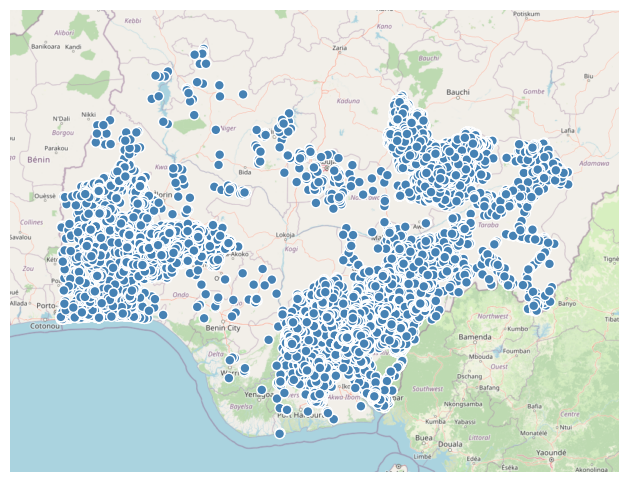

In [115]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())
gplt.pointplot(ng_water_points, projection=gplt.crs.WebMercator(), edgecolor='white', ax=ax, s=7)

C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\cartopy\mpl\geoaxes.py:862: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self.set_xlim([x1, x2])
C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\cartopy\mpl\geoaxes.py:863: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  self.set_ylim([y1, y2])


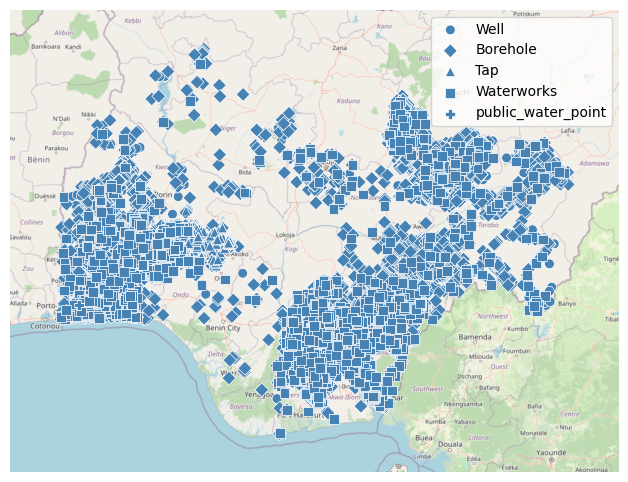

In [116]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())

markers = ["o", "D", "^", "s", "P", "X", "v", "d"]
unique_water_types = ng_water_points["water_type"].unique()

for i in range(len(unique_water_types)):
    gplt.pointplot(
        ng_water_points[ng_water_points["water_type"] == unique_water_types[i]],
        projection=gplt.crs.WebMercator(),
        ax=ax, marker=markers[i], label=unique_water_types[i],
        edgecolor='white', linewidth=0.5, s=7,
    )

gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator(), ax=ax)
ax.legend()
#     
# gplt.pointplot(ng_water_points, projection=gplt.crs.WebMercator(), ax=ax, hue="water_typ", legend=True, edgecolor='white', linewidth=0.5, marker='P')

<GeoAxes: >

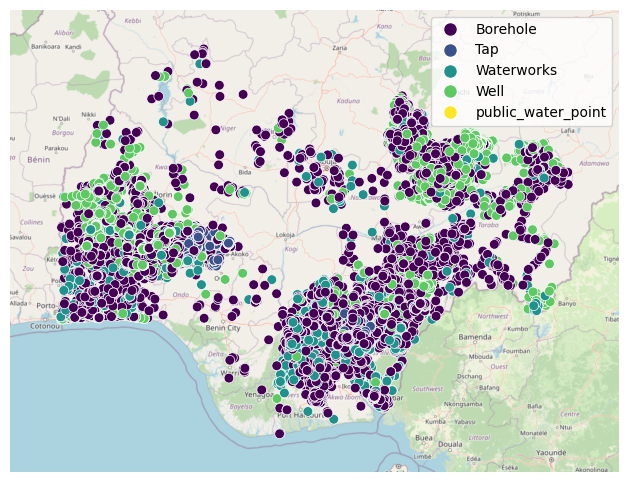

In [117]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())
gplt.pointplot(ng_water_points, hue="water_type", edgecolor='white', linewidth=0.5, ax=ax, legend=True, s=7)

# Add fake water quantity data

In [118]:
ng_water_points["water_type"].value_counts()

water_type
Borehole              16549
Well                   7344
Waterworks             3901
Tap                    1172
public_water_point        1
Name: count, dtype: int64

<Axes: xlabel='water_type'>

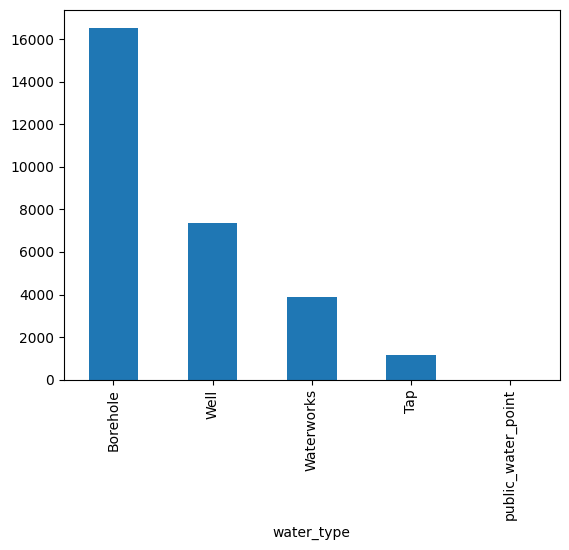

In [119]:
# bar graph of water type counts
ng_water_points["water_type"].value_counts().plot(kind="bar")

In [125]:
sd = 1

highest = stats.norm(7, sd)
high = stats.norm(4, sd)
medium = stats.norm(3, sd)
low = stats.norm(2, sd)

ng_water_points["water_quantity"] = np.nan

ng_water_points.loc[ng_water_points["water_type"] == "Waterworks", "water_quantity"]\
    = highest.rvs(ng_water_points["water_type"].value_counts()["Waterworks"])
ng_water_points.loc[ng_water_points["water_type"] == "Tap", "water_quantity"]\
    = highest.rvs(ng_water_points["water_type"].value_counts()["Tap"])
ng_water_points.loc[ng_water_points["water_type"] == "Borehole", "water_quantity"]\
    = low.rvs(ng_water_points["water_type"].value_counts()["Borehole"])
ng_water_points.loc[ng_water_points["water_type"] == "Well", "water_quantity"]\
    = low.rvs(ng_water_points["water_type"].value_counts()["Well"])
ng_water_points.loc[ng_water_points["water_type"] == "public_water_point", "water_quantity"]\
    = high.rvs(ng_water_points["water_type"].value_counts()["public_water_point"])

ng_water_points["water_quantity"] = ng_water_points["water_quantity"].clip(lower=1)

<GeoAxes: >

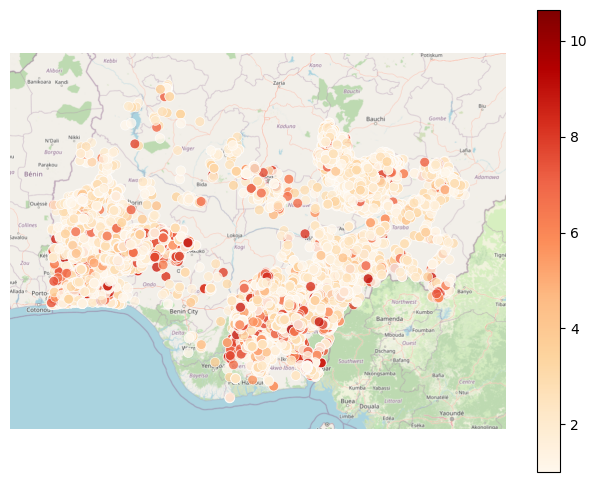

In [127]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())
gplt.pointplot(ng_water_points, hue="water_quantity", edgecolor='white', linewidth=0.5, ax=ax, legend=True, s=7, cmap="OrRd", alpha=0.8)

C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:248: UserWarning: Please specify "legend_var" explicitly when both "hue" and "scale" are specified. Defaulting to "legend_var='hue'".
  warnings.warn(


<GeoAxes: >

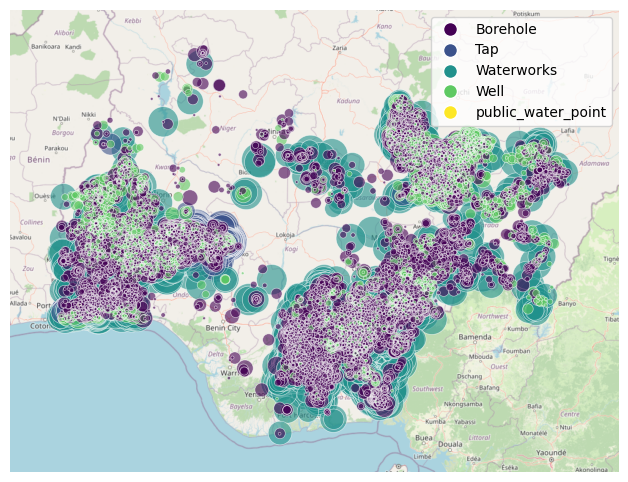

In [146]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())
gplt.pointplot(ng_water_points, scale="water_quantity", hue="water_type", edgecolor='white', linewidth=0.5, ax=ax, legend=True, alpha=0.6, limits=(2, 30))

# 

# Q-size C-shape

C:\Users\robot\Assignment_Workspace\ICTiAS\Geovis Recommendation\pythonProject\.venv\Lib\site-packages\geoplot\geoplot.py:615: UserWarning: Cannot set "figsize" when passing an "ax" to the plot. To remove this warning omit the "figsize" parameter.
  warnings.warn(


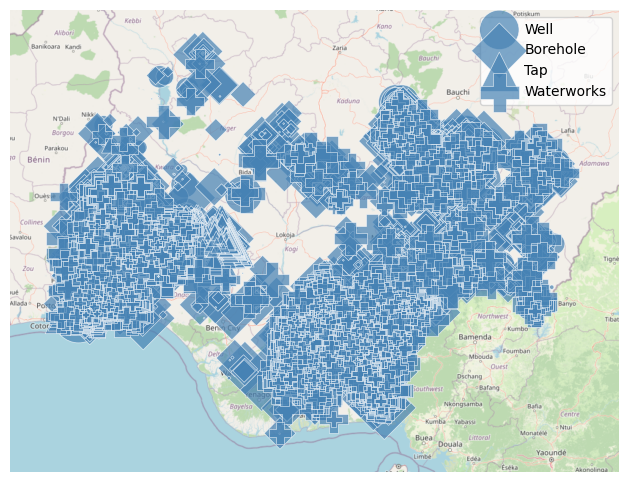

In [145]:
ax = gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator())

markers = ["o", "D", "^", "P", "s", "X", "v", "d"]
unique_water_types = ng_water_points["water_type"].unique()

for i in range(len(unique_water_types)):
    if i == 4:
        break
    gplt.pointplot(
        ng_water_points[ng_water_points["water_type"] == unique_water_types[i]],
        projection=gplt.crs.WebMercator(),
        ax=ax, marker=markers[i], label=unique_water_types[i],
        edgecolor='white', linewidth=0.5,
        scale="water_quantity", limits=(1, 40),
        alpha=0.7
    )

gplt.webmap(ng_water_points, projection=gplt.crs.WebMercator(), ax=ax, figsize=(12, 12))
ax.legend()

# Q-size C-shape Q-color